The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


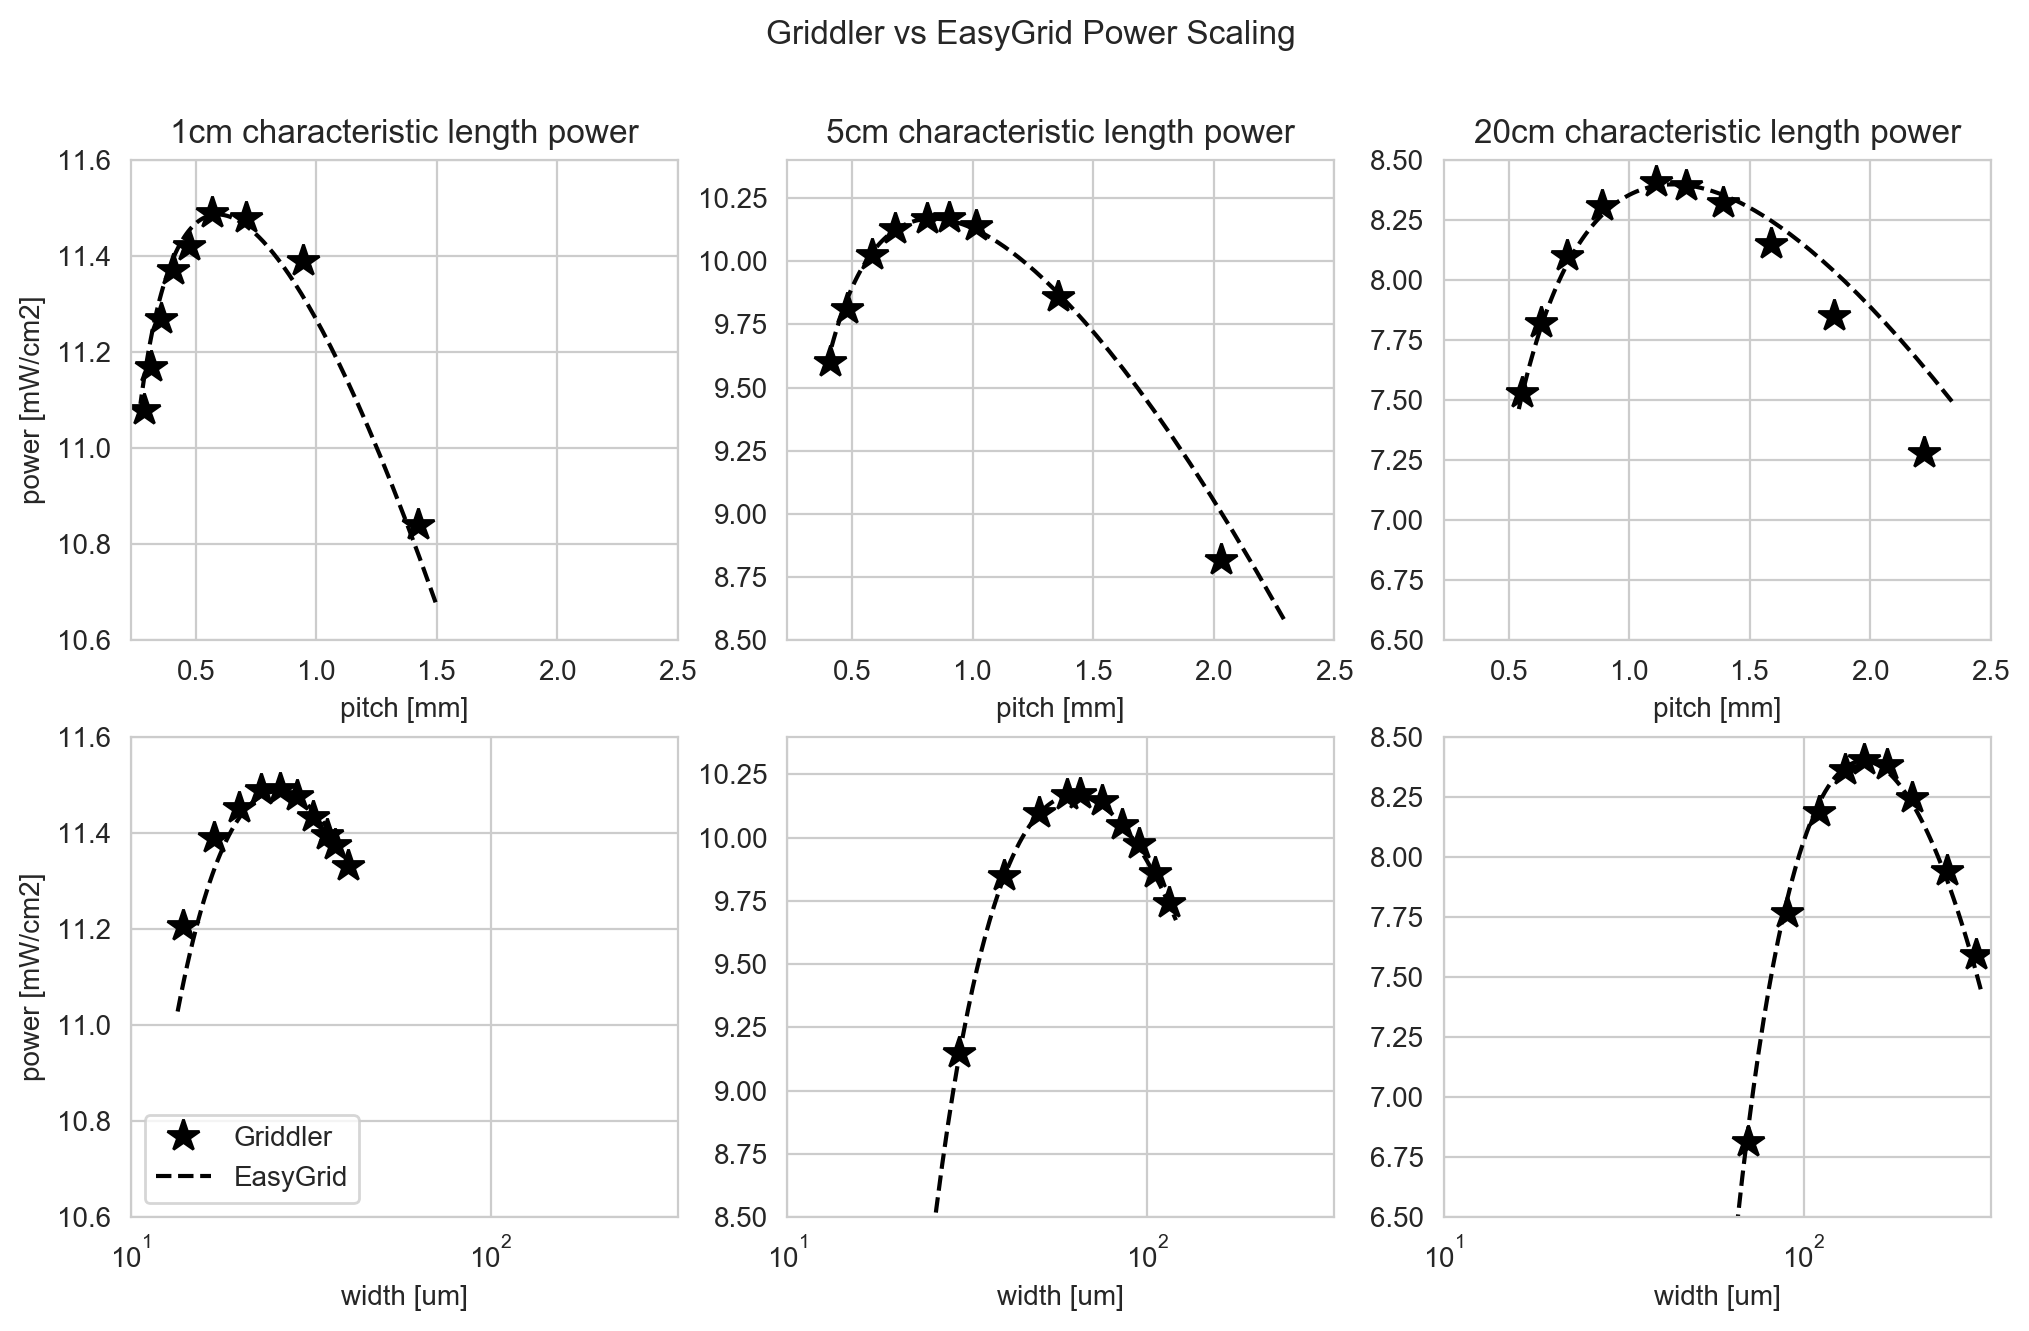

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

fig, axs = plt.subplots(2, 3, figsize=[12, 7], dpi=200)
fig.suptitle('Griddler vs EasyGrid Power Scaling')
for ax in axs[0, :]:
    ax.set_xlim([.23 ,2.5])
for ax in axs[1, :]:
    ax.set_xlim([10 , 330])

FILE = '1cm'
ax = axs[0, 0]
df = pd.read_csv('./data/' + FILE + '_pitch_griddler.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_pitch_sim.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k--')
ax.set_xlabel('pitch [mm]')
ax.set_ylabel('power [mW/cm2]')
ax.set_title(FILE + ' characteristic length power')
ax.set_ylim([10.6, 11.6])

ax = axs[1, 0]
df = pd.read_csv('./data/' + FILE + '_width_griddler.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_width_sim.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k--')
ax.set_xlabel('width [um]')
ax.set_ylabel('power [mW/cm2]')
ax.set_ylim([10.6, 11.6])
ax.legend(('Griddler', 'EasyGrid'), loc='lower left')


FILE = '5cm'
ax = axs[0, 1]
df = pd.read_csv('./data/' + FILE + '_pitch_griddler.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_pitch_sim.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k--')
ax.set_xlabel('pitch [mm]')
ax.set_title(FILE + ' characteristic length power')
ax.set_ylim([8.5, 10.4])

ax = axs[1, 1]
df = pd.read_csv('./data/' + FILE + '_width_griddler.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_width_sim.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k--')
ax.set_xlabel('width [um]')
ax.set_ylim([8.5, 10.4])


FILE = '20cm'
ax = axs[0, 2]
df = pd.read_csv('./data/' + FILE + '_pitch_griddler.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_pitch_sim.csv')
ax.plot(df['line pitch'] * 10, df['mW/cm2'], 'k--')
ax.set_xlabel('pitch [mm]')
ax.set_title(FILE + ' characteristic length power')
ax.set_ylim([6.5, 8.5])

ax = axs[1, 2]
df = pd.read_csv('./data/' + FILE + '_width_griddler.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k*', markersize=12)
df = pd.read_csv('./data/' + FILE + '_width_sim.csv')
ax.semilogx(df['line width'], df['mW/cm2'], 'k--')
ax.set_xlabel('width [um]')
ax.set_ylim([6.5, 8.5])

fig.savefig('scaling_plots.png')

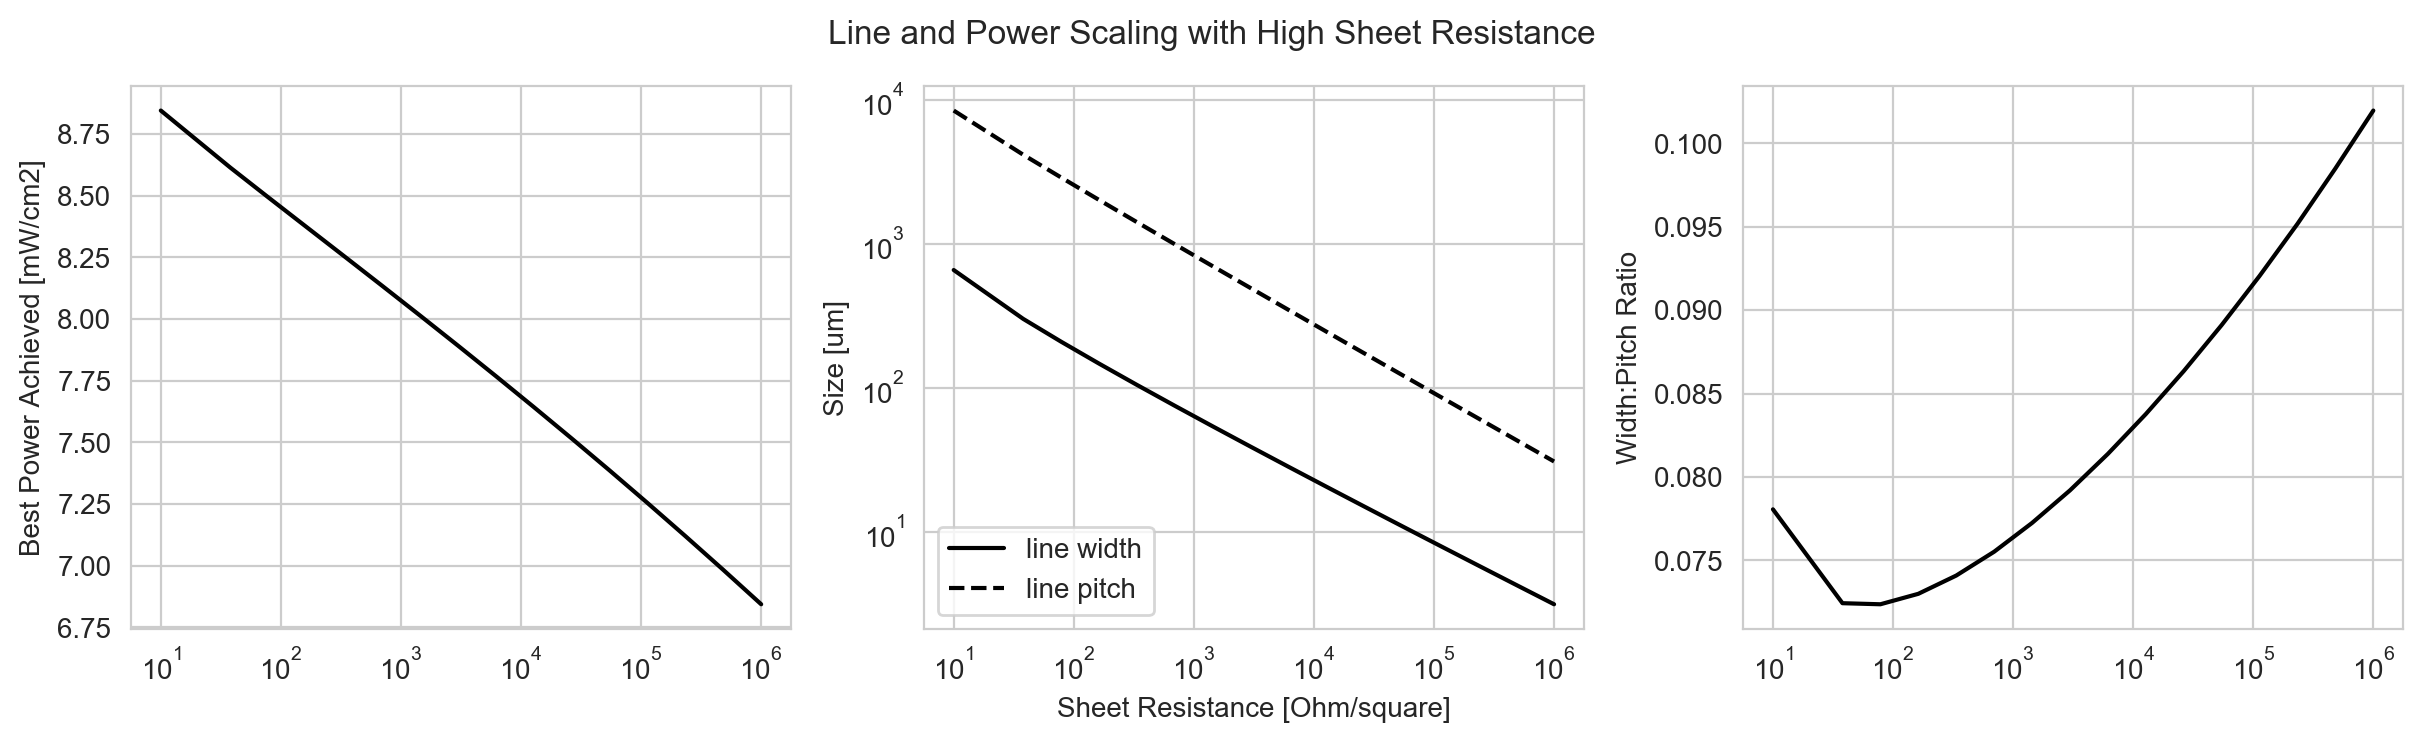

In [47]:
# Plot data from the increasing resistance experiment
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

FILE = './data/Psheet_walk.csv'
df = pd.read_csv(FILE)

fig, axs = plt.subplots(1, 3, figsize=[12, 3.6], dpi=200, constrained_layout=True)
fig.suptitle('Line and Power Scaling with High Sheet Resistance')

ax = axs[0]
ax.semilogx(df['Psheet'], df['Power'], 'k')
#ax.set_xlabel('Sheet Resistance [Ohm/square]')
ax.set_ylabel('Best Power Achieved [mW/cm2]')

ax = axs[1]
ax.loglog(df['Psheet'], 1e4 * df['line width'], 'k')
ax.loglog(df['Psheet'], 1e4 * df['line pitch'], 'k--')
ax.set_xlabel('Sheet Resistance [Ohm/square]')
ax.set_ylabel('Size [um]')
ax.legend(('line width', 'line pitch'), loc='lower left')

ax = axs[2]
ax.ticklabel_format(style='plain')
ax.semilogx(df['Psheet'], (df['line width'] / df['line pitch']).to_numpy(), 'k')
#ax.set_xlabel('Sheet Resistance [Ohm/square]')
ax.set_ylabel('Width:Pitch Ratio')

fig.savefig('sheet_walk_plots.png')